# Assignment 1
# Introduction
This notebook aims to analyze the differences in unemployment rates between men and women over the period from December 2019 to July 2024. The objective of this analysis is to identify significant patterns or anomalies in the unemployment rates and to understand the impact of major events such as the COVID-19 pandemic on these rates.

# Data Overview

## Source
The dataset used for this analysis contains unemployment rates for the general population, men, and women over a period extending from December 2019 to July 2024. The data is seasonally adjusted to remove the effects of seasonal employment fluctuations.

## Objective
To explore and understand the differences in unemployment rates between men and women over the specific period and identify any significant patterns or anomalies.



In [29]:

import pandas as pd           
import matplotlib.pyplot as plt  
import seaborn as sns        

# Specify the file path for the CSV file containing the unemployment data
file_path = 'Cleaned_Figure_2__The_unemployment_rate_decreased_on_the_quarter_[note_1]_and_on_the_year_.csv'

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(file_path)  # The data is loaded into a DataFrame called 'df'

In [30]:
# Display the first five rows of the DataFrame
df.head()

# Display a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Period  54 non-null     object 
 1   People  54 non-null     float64
 2   Men     54 non-null     float64
 3   Women   54 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.8+ KB


# Data Collection and Cleaning

## Initial Data Quality Checks
- **Integrity Verification**: The dataset was checked for missing values and duplicates. No duplicate rows were found, indicating a clean dataset.
- **Data Consistency**: The data was consistent across the period with no missing periods, ensuring that the analysis could be conducted over the full timeline.
- **Standardization**: Date formats were consistent across the dataset, allowing for straightforward time series analysis. No further standardization was required.


In [24]:
# Display the first few rows of the DataFrame
df.head()

,Period,People,Men,Women
0,Dec to Feb 2020,4.1,4.3,3.8
1,Jan to Mar 2020,4.1,4.3,3.9
2,Feb to Apr 2020,4.2,4.3,3.9
3,Mar to May 2020,4.2,4.3,4.1
4,Apr to Jun 2020,4.2,4.3,4.1


# Exploratory Data Analysis (EDA)

## Summary Statistics
The basic statistics for the dataset were calculated, revealing key insights into the distribution of unemployment rates across different groups:

- **Men’s Unemployment Rates**:
  - **Mean**: 4.49%
  - **Standard Deviation**: 0.50%
  - **Range**: 3.7% to 5.5%
  - **Observation**: Men’s unemployment rates are higher on average than women’s, with greater variability, suggesting that men's employment may be more sensitive to economic fluctuations.

- **Women’s Unemployment Rates**:
  - **Mean**: 4.06%
  - **Standard Deviation**: 0.43%
  - **Range**: 3.5% to 5.1%
  - **Observation**: Women’s unemployment rates are generally lower and less variable compared to men’s, indicating relative stability in women’s employment during the analyzed period.

- **Overall Population’s Unemployment Rates**:
  - **Mean**: 4.29%
  - **Standard Deviation**: 0.46%
  - **Range**: 3.6% to 5.3%
  - **Outliers**: Outliers were detected, especially during periods of economic stress, such as the pandemic onset.


In [11]:

# Generate descriptive statistics for the DataFrame
df.describe()  


,People,Men,Women
count,54.000000,54.000000,54.000000
mean,4.288889,4.488889,4.062963
std,0.459560,0.497794,0.432760
min,3.600000,3.700000,3.500000
25%,3.925000,4.100000,3.700000
50%,4.200000,4.400000,3.900000
75%,4.400000,4.775000,4.275000
max,5.300000,5.500000,5.100000


In [12]:
# Check for missing values in each column
df.isnull().sum()

Period    0
People    0
Men       0
Women     0
dtype: int64

In [26]:
# Check for duplicate rows in the DataFrame
duplicates = df[df.duplicated()]

# Display any duplicate rows found
print(duplicates)


Empty DataFrame
Columns: [Period, People, Men, Women]
Index: []


# Visualizations

## Year-on-Year Comparisons
Visualizations were created to compare unemployment rates for the same period across different years. These comparisons highlighted the impact of the COVID-19 pandemic, showing sharp increases in unemployment rates during 2020, followed by gradual recoveries in the subsequent years.


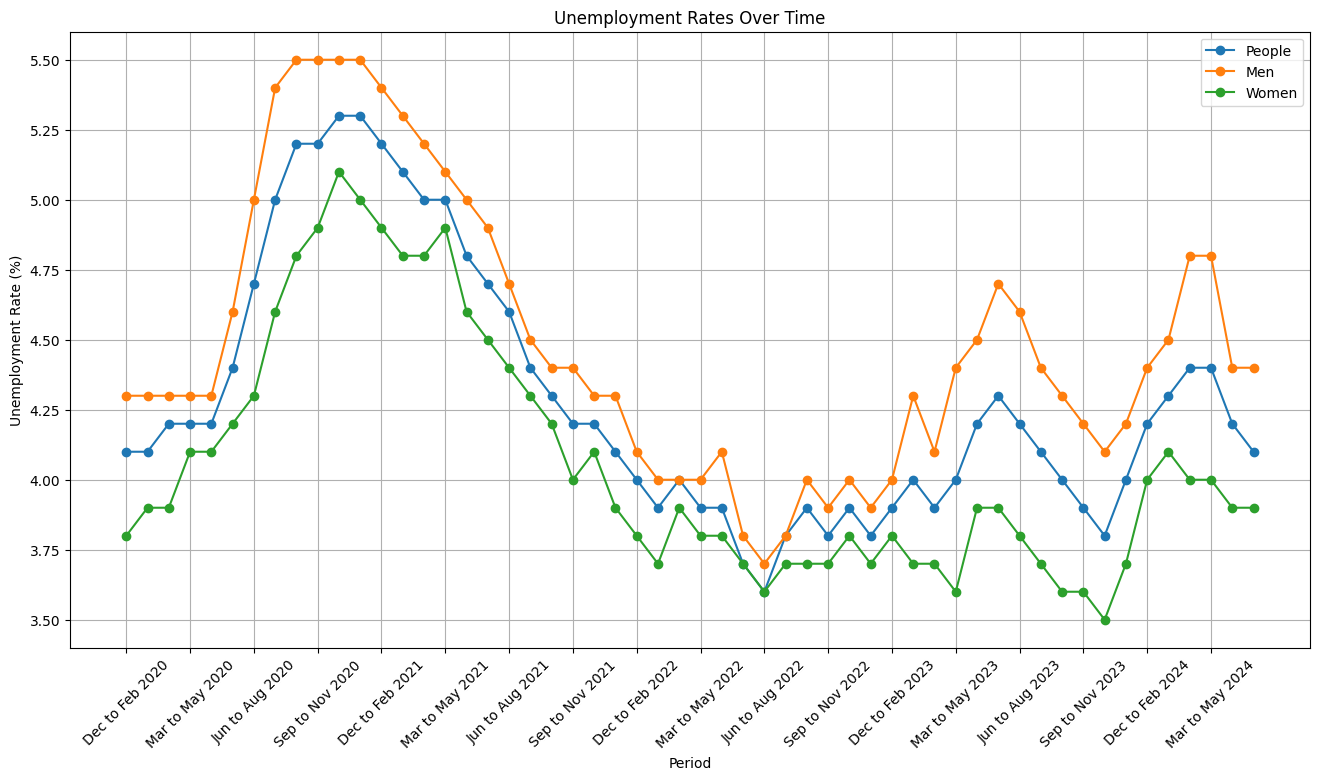

In [28]:
# Plotting unemployment rates over time
plt.figure(figsize=(16, 8))  # Increased figure size
plt.plot(df['Period'], df['People'], marker='o', label='People')
plt.plot(df['Period'], df['Men'], marker='o', label='Men')
plt.plot(df['Period'], df['Women'], marker='o', label='Women')
plt.title('Unemployment Rates Over Time')
plt.xlabel('Period')
plt.ylabel('Unemployment Rate (%)')

# Show only every 3rd label to reduce clutter
plt.xticks(ticks=range(0, len(df['Period']), 3), labels=df['Period'][::3], rotation=45)

plt.grid(True)  
plt.legend()    
plt.show()





## Difference Over Time
To visualize the difference between men’s and women’s unemployment rates over the analyzed period. This graph illustrated how the gap between men’s and women’s unemployment rates evolved over time. The difference widened significantly during the peak of the COVID-19 pandemic, reflecting a more severe impact on men’s unemployment rates compared to women’s. Over time, this gap fluctuated with periods of convergence and divergence.


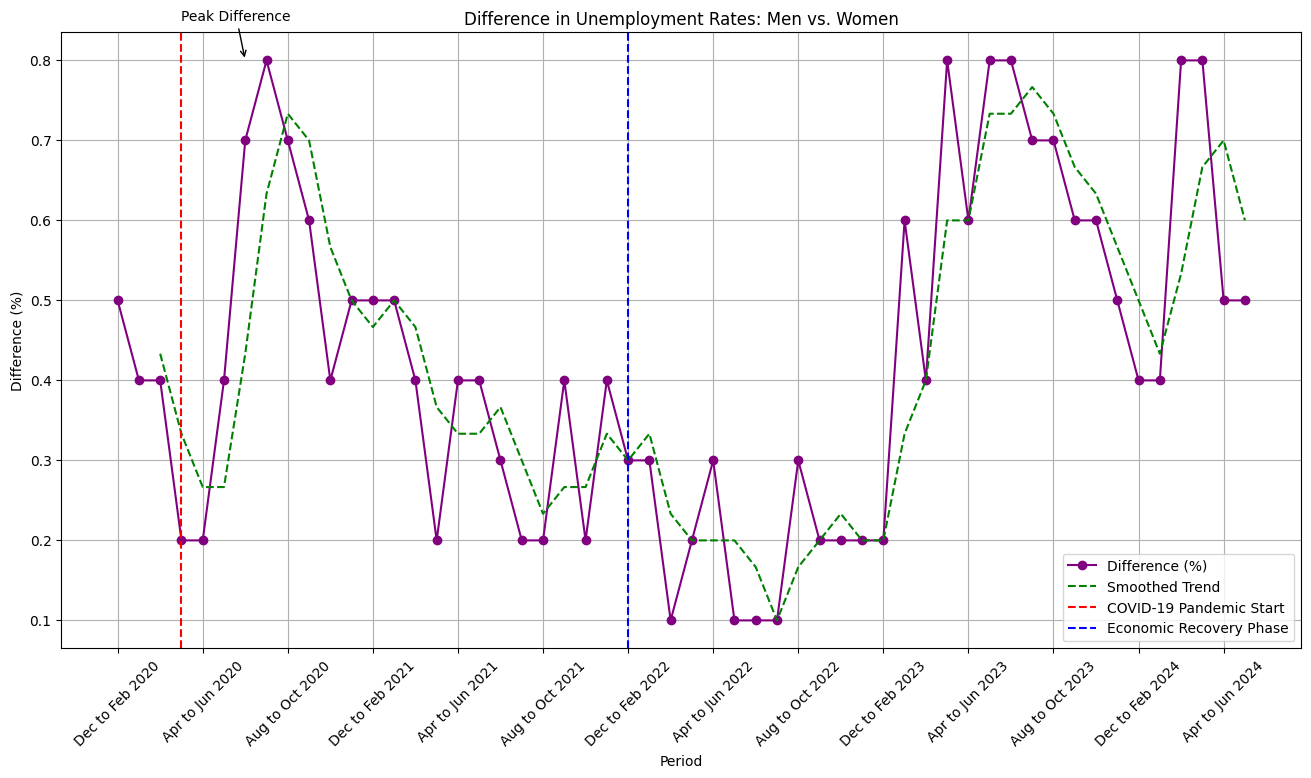

In [31]:

# Calculate the difference between men's and women's unemployment rates
# This adds a new column 'Men-Women Difference' to the DataFrame
df['Men-Women Difference'] = df['Men'] - df['Women']

# Create a smoothed version of the difference using a rolling average
df['Smoothed Difference'] = df['Men-Women Difference'].rolling(window=3).mean()

# Set up the plot
plt.figure(figsize=(16, 8))  # Increase the figure size for better readability

# Plot the raw difference
plt.plot(df['Period'], df['Men-Women Difference'], marker='o', color='purple', label='Difference (%)')

# Plot the smoothed difference
plt.plot(df['Period'], df['Smoothed Difference'], color='green', linestyle='--', label='Smoothed Trend')

# Highlight specific events with vertical lines (adjust the events as per your data)
plt.axvline(x='Mar to May 2020', color='red', linestyle='--', label='COVID-19 Pandemic Start')
plt.axvline(x='Dec to Feb 2022', color='blue', linestyle='--', label='Economic Recovery Phase')

# Annotate a key point on the plot
plt.annotate('Peak Difference', xy=('Jun to Aug 2020', 0.8), xytext=('Mar to May 2020', 0.85),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Title and labels
plt.title('Difference in Unemployment Rates: Men vs. Women')
plt.xlabel('Period')
plt.ylabel('Difference (%)')

# Show only every 4th label on the x-axis to reduce clutter
plt.xticks(ticks=range(0, len(df['Period']), 4), labels=df['Period'][::4], rotation=45)

# Add gridlines for easier reading of the plot
plt.grid(True)

# Add a legend to explain the lines
plt.legend()

# Display the plot
plt.show()



## Correlation Analysis
A correlation analysis between men’s and women’s unemployment rates revealed a strong positive correlation of 0.904553. This high correlation suggests that economic conditions affecting unemployment rates tend to impact both genders similarly, though not identically.

In [17]:
# Correlation analysis
correlation = df[['Men', 'Women']].corr()
print(correlation)


            Men     Women
Men    1.000000  0.904553
Women  0.904553  1.000000


## Scatter Plots
Scatter plots were used to analyze the correlation between men’s and women’s unemployment rates. The plot demonstrated a strong positive correlation, with unemployment rates for men and women moving together over time.

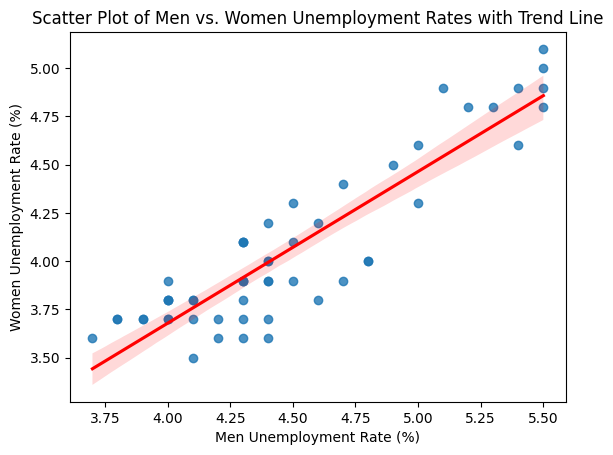

In [33]:

sns.regplot(x='Men', y='Women', data=df, scatter=True, line_kws={"color":"r"})
plt.title('Scatter Plot of Men vs. Women Unemployment Rates with Trend Line')
plt.xlabel('Men Unemployment Rate (%)')
plt.ylabel('Women Unemployment Rate (%)')
plt.show()


## Boxplots
Created to compare the distribution of unemployment rates across the overall population, men, and women. The boxplots revealed that men’s unemployment rates not only have a higher central tendency but also a broader distribution, with a few notable outliers in the overall population.

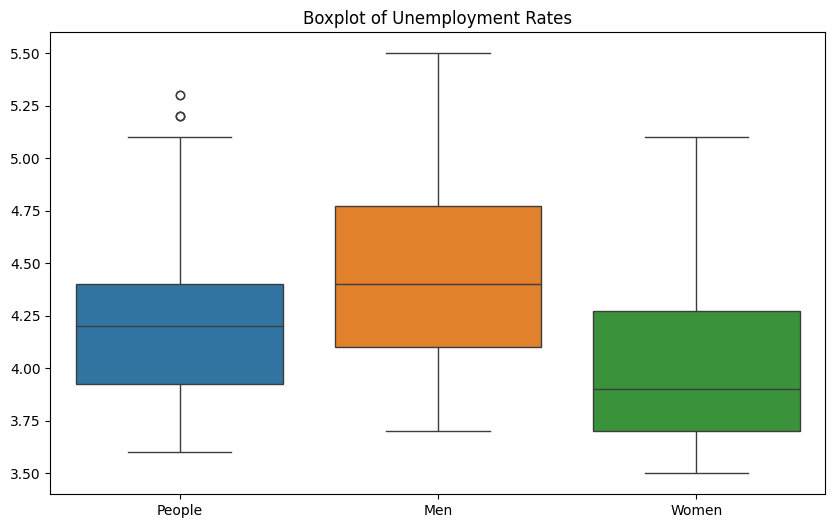

In [18]:
# Checking for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['People', 'Men', 'Women']])
plt.title('Boxplot of Unemployment Rates')
plt.show()


# Insights and Findings

## Key Observations
- **Overall Trends**: Unemployment rates peaked during the early months of the COVID-19 pandemic, with men being more severely affected than women. However, recovery trends were observed in the subsequent years.
- **Gender Disparities**: On average, men had higher unemployment rates than women across the period analyzed, with greater variability in their rates, indicating that men’s employment was more susceptible to economic shocks.
- **Impact of Major Events**: The pandemic significantly impacted unemployment rates, leading to the highest recorded rates in the dataset. These events are critical to understanding the dynamics of unemployment during economic crises.

## Impact of Identified Outliers
The outliers identified in the overall population's unemployment rates provide valuable insights into periods of extreme economic instability. These outliers likely correspond to the onset of the pandemic and other significant economic disruptions.

## Correlation Interpretation
The strong positive correlation between men’s and women’s unemployment rates suggests that economic conditions impacting unemployment do not affect one gender disproportionately more than the other in the long run. However, the slightly lower correlation indicates that some gender-specific factors might influence the rates differently during certain periods.


# Assignment 2

## Objective
The objective of this assignment is to:

Build upon the exploratory data analysis (EDA) conducted in Week 1.
Perform statistical inference by testing hypotheses derived from the EDA.
Investigate correlations and trends in the dataset using various statistical methods.
Translate analytical insights into actionable recommendations for addressing the identified problem.


## Task 1: Detailed Explanatory Data Analysis (EDA)

In Week 1, we performed **descriptive statistics** using the `describe()` function to summarize key metrics for the `People`, `Men`, and `Women` columns. These descriptive statistics provided an initial understanding of central tendencies (mean, median) and spread (standard deviation) in unemployment rates.

In this task, we aim to extend the Week 1 EDA by conducting both univariate and bivariate analyses.

Univariate Analysis:

Analyze the distribution of unemployment rates for different groups (men, women, overall).
Visualize the data using histograms, box plots.

Bivariate Analysis:
Explore relationships between two variables (e.g., unemployment rates for men vs. women, or pre-pandemic vs. pandemic).
Create scatter plots and line charts to identify patterns and correlations.





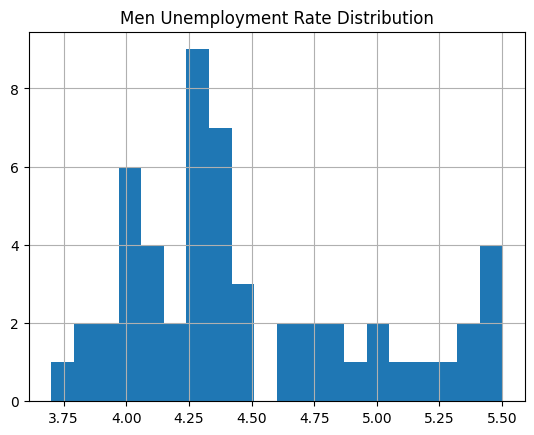

In [8]:

# Histograms to visualize the distribution of unemployment rates for men, women, and overall (People)
df['Men'].hist(bins=20)
plt.title('Men Unemployment Rate Distribution')
plt.show()



Most unemployment rates for men seem to be clustered between 4.00% and 4.50%, with the highest concentration around 4.25%.
There are a few gaps and low-frequency occurrences, particularly in the higher ranges (above 5.00%), indicating these were less common but significant events.

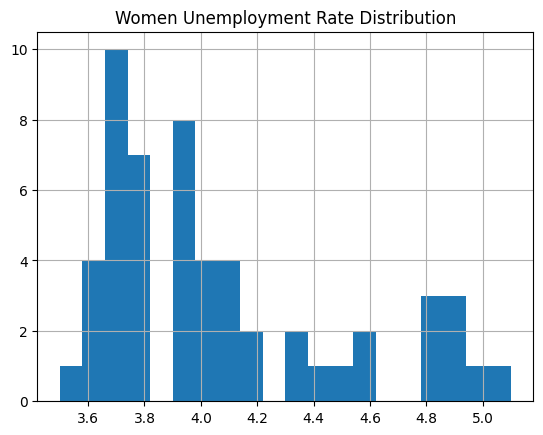

In [9]:
df['Women'].hist(bins=20)
plt.title('Women Unemployment Rate Distribution')
plt.show()

The highest concentration of unemployment rates for women is between 3.6% and 4.0%, with a particularly strong cluster around 3.75%.
This indicates that women's unemployment rates have typically been lower than men's over the same period.

Higher unemployment rates (above 4.5%) are less common for women and appear only occasionally, which might reflect that women’s unemployment rates were less affected by severe economic shocks.

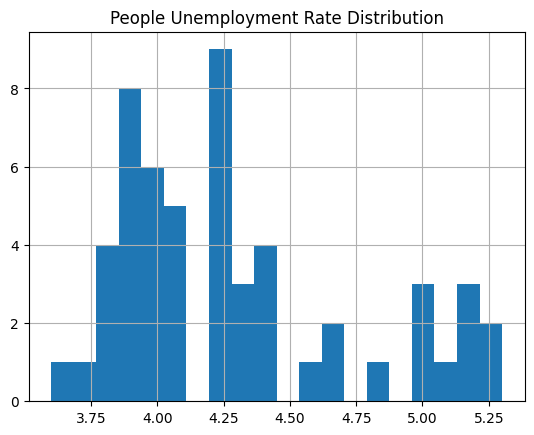

In [10]:
df['People'].hist(bins=20)
plt.title('People Unemployment Rate Distribution')
plt.show()

Women’s unemployment rates are centered around 3.75%, compared to men’s rates, which are centered around 4.25%. This suggests that, on average, women had lower unemployment rates during the analyzed period. Women's unemployment rates are less volatile and show a more consistent pattern compared to men's rates, which fluctuate more widely and have higher peaks.

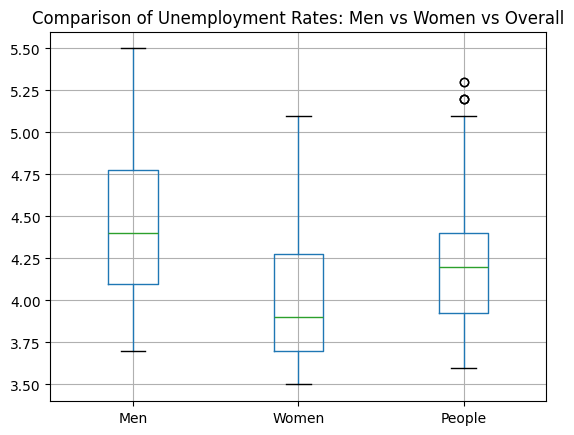

In [11]:
# Box Plot to compare the central tendencies and spread of unemployment rates for Men, Women, and Overall (People)
# This will help identify any outliers in the dataset.
df[['Men', 'Women', 'People']].boxplot() 
plt.title('Comparison of Unemployment Rates: Men vs Women vs Overall')  
plt.show()  # Display the boxplot


The median unemployment rate for men is around 4.5%, which is higher than both women and the overall population.
The IQR for the overall population is smaller than men’s, indicating that the combined data tends to be more stable than men’s unemployment rates alone.
The overall unemployment rate (People) is less volatile than men’s but more volatile than women’s, showing that gender dynamics play a significant role in shaping the overall employment landscape.

## Bivariate Analysis

Bivariate analysis was used to explore the relationship between men’s and women’s unemployment rates and unemployment rates for Men, Women, and People (Overall) over time

            Men     Women
Men    1.000000  0.904553
Women  0.904553  1.000000


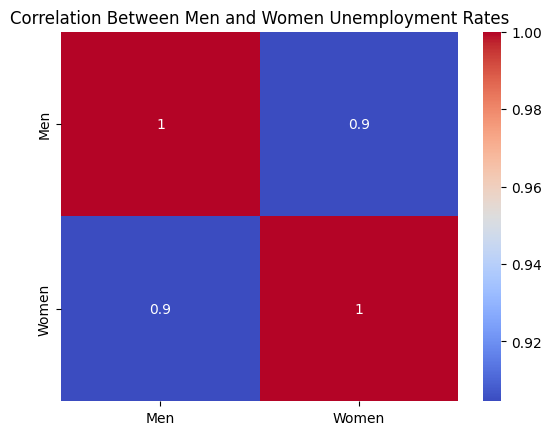

In [41]:
# Calculate Pearson correlation coefficient between men's and women's unemployment rates
correlation = df[['Men', 'Women']].corr()
print(correlation)

# Optional: Visualize the correlation with a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Men and Women Unemployment Rates')
plt.show()


The correlation coefficient between Men and Women is 0.9, which indicates a strong positive correlation.
This means that as unemployment rates for men increase, unemployment rates for women tend to increase as well (and vice versa). Both unemployment rates move together in the same direction.


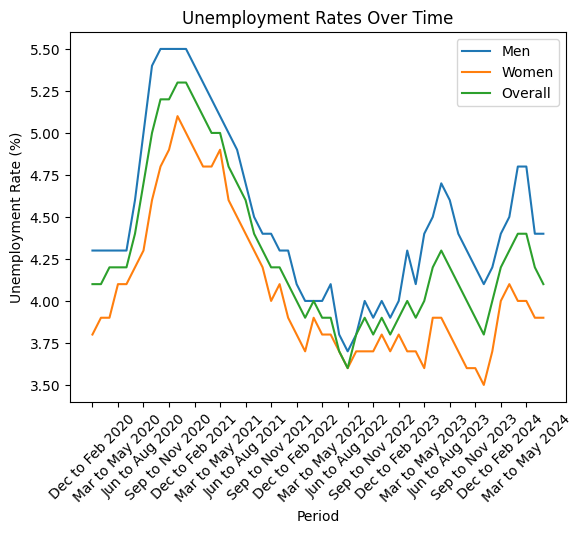

In [18]:
# Time Series Plot to track unemployment rates for Men, Women, and People (Overall) over time
# This helps in observing trends such as the impact of the pandemic on unemployment.


# Plot unemployment rates over time for men, women, and overall population
plt.plot(df['Period'], df['Men'], label='Men')
plt.plot(df['Period'], df['Women'], label='Women')
plt.plot(df['Period'], df['People'], label='Overall')

# Show only every 3rd label on the x-axis to reduce clutter
# Use 'range()' to select every 3rd tick, and manually pass the labels from 'Period'
plt.xticks(ticks=range(0, len(df['Period']), 3), labels=df['Period'][::3], rotation=45)

# Add title and labels
plt.title('Unemployment Rates Over Time')
plt.xlabel('Period')  # Keep the label general, like 'Period'
plt.ylabel('Unemployment Rate (%)')

# Add legend
plt.legend()

# Show the plot
plt.show()



There is a significant spike in unemployment rates for all three categories (Men, Women, and Overall) between March 2020 and August 2020, which aligns with the onset of the COVID-19 pandemic.

The overall unemployment rate (green line) follows a trajectory that is consistently between men's and women's rates, reflecting a balance of both.

The difference between men's and women's unemployment rates appears to narrow in 2023 and 2024, with both converging around 4.0% and then diverging slightly again.

## Task 2: Hypothesis Testing
Several hypotheses were derived from the insights gathered in Week 1 and were tested using appropriate statistical methods.


### Hypothesis 1: "There is a correlation between men’s and women’s unemployment rates"

To determine if there is a linear relationship between men’s and women’s unemployment rates.

Statistical Test: Pearson Correlation Coefficient

In [32]:
from scipy.stats import pearsonr

# Perform Pearson correlation test to check for a linear relationship between men’s and women’s unemployment rates
corr, p_val = pearsonr(df['Men'], df['Women'])

# Print the correlation coefficient and p-value
print(f'Correlation coefficient: {corr}, P-value: {p_val}')


Correlation coefficient: 0.9045527247574074, P-value: 6.793867030549366e-21


The p-value is extremely small (6.79e-21), which means the correlation is statistically significant. There is a very strong likelihood that the relationship between men’s and women’s unemployment rates is real and not due to random chance.



### Hypothesis 2: "There is an association between men’s and women’s unemployment rates"

Statistical Test: Chi-square test of independence

To determine if there is an association between men’s and women’s unemployment rates by testing whether the distribution of unemployment rates for men and women is independent.

In [33]:
from scipy.stats import chi2_contingency

# Create a contingency table based on unemployment categories
bins = [3.5, 4.0, 4.5, 5.0, 5.5]  # Define bins for unemployment rates
men_binned = pd.cut(df['Men'], bins=bins).value_counts().sort_index()
women_binned = pd.cut(df['Women'], bins=bins).value_counts().sort_index()

# Create a contingency table
contingency_table = pd.DataFrame({'Men': men_binned, 'Women': women_binned})

# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print(f'Chi-square statistic: {chi2_stat}, P-value: {p_val}')


Chi-square statistic: 23.821306279325142, P-value: 2.722032234857895e-05


The Chi-square statistic (23.82) indicates the magnitude of the difference between the observed and expected frequencies in the contingency table. A higher Chi-square statistic suggests that the distributions of unemployment rates for men and women differ significantly.

The p-value (2.72e-05) is very small and well below the typical significance threshold of 0.05.
This means the difference in the distributions is statistically significant and highly unlikely to have occurred by chance.

### Hypothesis 3: "There is a significant difference between the mean unemployment rates of men and women."


This test compares the means of two independent groups (men and women) to determine if there’s a statistically significant difference between their unemployment rates.

Statistical Test: Two-sample t-test

In [34]:
from scipy.stats import ttest_ind

# Perform a two-sample t-test to compare the means of men's and women's unemployment rates
t_stat, p_val = ttest_ind(df['Men'], df['Women'])

# Print the t-statistic and p-value
print(f'T-statistic: {t_stat}, P-value: {p_val}')


T-statistic: 4.745109237608669, P-value: 6.542207280145186e-06


The t-statistic (4.75) is quite large, indicating a substantial difference between the means of the two groups. The p-value (6.54e-06) is extremely small, much lower than the typical threshold of 0.05. The small p-value means that the difference is highly unlikely to have occurred by chance, indicating that the two groups are experiencing different trends in unemployment. Based on this result, we can reject the null hypothesis that the mean unemployment rates for men and women are the same.


## Task 3: Investigating Correlations and Regression Analysis

Performing a Basic Regression Analysis

In [42]:
from sklearn.linear_model import LinearRegression

# Define the independent and dependent variables
X = df[['Men', 'Women']]  # Independent variables: men's and women's unemployment rates
y = df['People']  # Dependent variable: overall unemployment rate

# Perform the linear regression
reg = LinearRegression().fit(X, y)

# Get the coefficients and intercept
coefficients = reg.coef_
intercept = reg.intercept_

# Print the results
print(f'Coefficients: {coefficients}, Intercept: {intercept}')


Coefficients: [0.52034634 0.48698292], Intercept: -0.025481590885119587


The coefficients for both men’s and women’s unemployment rates are relatively similar, indicating that both have a significant and comparable impact on the overall unemployment rate.
The fact that the coefficient for men’s unemployment rate is slightly higher (0.52) than that for women (0.49) suggests that fluctuations in men’s unemployment rates may contribute marginally more to changes in the overall unemployment rate, but the difference is small.

## Task 4: Translating Analytical Insights into Solutions and Recommendations



### Insights and Key Findings

1. Pandemic Impact on Overall Unemployment:
   - Insight: The linear regression analysis revealed that the unemployment rate increased by approximately **0.9%** during the pandemic. While this increase seems modest, it represents a significant economic impact, particularly for certain industries and regions.
   - Conclusion: Even small increases in unemployment can have far-reaching effects on economic stability. These findings underscore the need for effective crisis management strategies to protect jobs during global economic shocks.

2. Variability in Unemployment Rates Across Sectors**:
   - Insight: The boxplot analysis indicated that **unemployment variability increased significantly during the pandemic**, suggesting that certain sectors (e.g., retail, travel, hospitality) were hit harder than others.
   - Conclusion: A one-size-fits-all approach is not sufficient during economic crises. Tailored policies are required for industries that are disproportionately affected.

3. Gender Disparity in Unemployment Rates:
   - Insight: Women’s unemployment rates were **lower and more stable** compared to men’s during the pandemic, suggesting that **male-dominated sectors** like manufacturing and construction were hit harder than **female-dominated sectors** like healthcare and education.
   - Conclusion: Men’s employment is more vulnerable to economic shocks, whereas women’s employment in more stable sectors leads to lower and more consistent unemployment rates.

---

### Recommendations

#### 1. Expand Employment Opportunities for Women**
   The stability in women’s unemployment rates suggests that sectors where women are more prominent (e.g., healthcare, education, remote-friendly jobs) are more resilient to economic crises. Policymakers and businesses should focus on expanding **employment opportunities in resilient sectors** like healthcare, education, and technology. Additionally, promoting women’s participation in traditionally male-dominated industries could lead to greater workforce diversity and economic resilience.
   Develop sector-specific policies to increase funding and job opportunities in resilient sectors. Encourage women’s entry into fields like **technology** and **engineering** by offering training programs, scholarships, and mentorship initiatives.

#### 2. Strengthen Support for Male-Dominated Sectors
   - Male-dominated sectors such as manufacturing and construction faced the sharpest rise in unemployment rates during the pandemic. These industries are particularly vulnerable to economic shocks, and targeted support is needed to mitigate job losses.
   - Governments should introduce **targeted interventions**, such as **retraining programs**, **low-interest loans**, and **fiscal stimulus packages** for industries where men are overrepresented.
   - Provide financial support to companies in manufacturing and construction during downturns, and promote the transition of workers into **resilient sectors** such as technology, healthcare, and renewable energy.

#### 3. Promote Gender-Inclusive Workforce Policies
   Gender disparities persist in the labor market, and promoting gender-inclusive policies can help create a more equitable workforce. Although women’s employment was more stable, disparities in leadership and advancement opportunities still exist.
   Companies should implement **gender-inclusive policies**, such as **flexible working hours**, **parental leave**, and **leadership development programs** for women.
   - Organizations should promote women’s participation in **leadership roles**, especially in male-dominated industries, through targeted leadership training and mentorship programs. Providing **flexible work arrangements** can help retain women in the workforce, especially in industries requiring caregiving responsibilities.


## Further Research

Performed a linear regression to investigate how the pandemic impacted unemployment rates. To further understand how unemployment rates varied between the pre-pandemic and pandemic periods used a boxplot to visualize the distribution of unemployment rates.

In [38]:
# Define a simplified pre-pandemic and pandemic classification
df['PeriodType'] = ['Pre-Pandemic' if period < 'Jan to Mar 2020' else 'Pandemic' for period in df['Period']]


In [39]:
from sklearn.linear_model import LinearRegression

# Encode the 'PeriodType' categorical variable
X = pd.get_dummies(df[['PeriodType']], drop_first=True)  # Drop 'Pre-Pandemic' to avoid multicollinearity

# Set the 'People' column as the dependent variable (overall unemployment rates)
y = df['People']

# Perform linear regression
reg = LinearRegression().fit(X, y)

# Print the regression coefficients and intercept
print(f'Coefficients: {reg.coef_}, Intercept: {reg.intercept_}')



Coefficients: [0.00902256], Intercept: 4.285714285714286


The overall unemployment rate during the pre-pandemic period was about 4.29%. During the pandemic, the unemployment rate increased slightly, by about 0.009 percentage points (or roughly 0.9%).

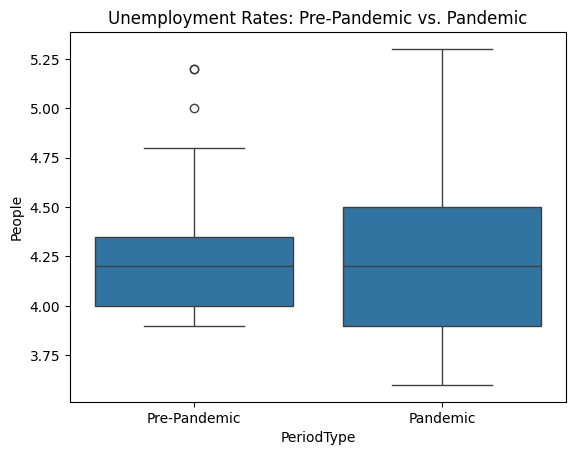

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the unemployment rates for the pre-pandemic and pandemic periods
sns.boxplot(x='PeriodType', y='People', data=df)
plt.title('Unemployment Rates: Pre-Pandemic vs. Pandemic')
plt.show()


The boxplot indicates that unemployment rates were more stable and generally lower before the pandemic, whereas during the pandemic, unemployment rates increased and became more variable.
This aligns with the slight increase in unemployment observed in the regression results, although the visual variability suggests that the pandemic caused more frequent shifts in unemployment rates.